# Replicating Figure II of the Paper -- "Impact of Minimum Wages on the Wage Distribution"

# 1. Data Cloning from Github

### This block of code is designed to acquire and prepare data for a data science project focused on economic and social issues. Here's a breakdown of what each part does and the tasks it accomplishes:

- Cloning the Repository: The git clone command is used to clone (i.e., download) a complete repository from GitHub that contains the data science project on economic and social issues into the current working environment. This ensures all files and data within the repository are available locally.
- Changing the Working Directory: The %cd command changes the current working directory to the root of the cloned repository, ensuring that subsequent operations are performed within the correct folder.
- Entering a Specific Subfolder: If specific data or scripts within the repository are needed, the code uses another %cd command to navigate into a subdirectory that contains the desired data.
- Importing Data Handling Library: The code imports the pandas library, which is a primary tool in Python for data analysis and manipulation.
- Listing Files: It uses the !ls command to list all files in the current directory. This step verifies the presence of a specific data file, such as Figure2_for_QJE.dta.zip, which is expected to be in the repository.
- Unzipping the Data File: The !unzip command is used to decompress the .zip file to extract the Stata data file (.dta file) contained within.
- Reading and Checking the Data: The read_stata function from pandas is utilized to read the extracted .dta file into a DataFrame object. The head function is then called to print the first few rows of the DataFrame to ensure the data has been loaded correctly and is free of initial errors.
- The entire process marks the beginning of a data analysis workflow, involving acquiring data from remote resources, verifying the presence of files, and preparing data for further analysis or processing. These steps are typically automated and repetitive, aimed at reducing the need for manual data handling.


In [ ]:
# Cloning the Entire Repository
!git clone https://github.com/mjahangiralam/Data-Science-for-Economic-and-Social-Issues.git

# Changing Directory to the Cloned Repository
%cd Data-Science-for-Economic-and-Social-Issues/

# If needed, change to a specific subfolder
%cd DiD/Cengiz-et-al

# Importing pandas for data handling
import pandas as pd

# List all files in the current directory to confirm the presence of 'Figure2_for_QJE.dta.zip'
!ls

# Unzipping the 'Figure2_for_QJE.dta.zip' file to extract the Stata (.dta) file
!unzip Figure2_for_QJE.dta.zip

# Once the file is extracted, read the Stata file using pandas.
# Assuming the extracted Stata file retains the name 'Figure2_for_QJE.dta'
data = pd.read_stata('Figure2_for_QJE.dta')
print(data.head())

fatal: destination path 'Data-Science-for-Economic-and-Social-Issues' already exists and is not an empty directory.
/content/Data-Science-for-Economic-and-Social-Issues
/content/Data-Science-for-Economic-and-Social-Issues/DiD/Cengiz-et-al
Figure2_for_QJE.dta  Figure2_for_QJE.dta.zip  Table1_for_QJE.dta.zip
Archive:  Figure2_for_QJE.dta.zip
replace Figure2_for_QJE.dta? [y]es, [n]o, [A]ll, [N]one, [r]ename:    statenum  quarterdate  hispanicpop   dmarriedpop      whitepop  \
0         1           76  5355.373372  1.706204e+06  2.028900e+06   
1         1           76  5355.373372  1.706204e+06  2.028900e+06   
2         1           76  5355.373372  1.706204e+06  2.028900e+06   
3         1           76  5355.373372  1.706204e+06  2.028900e+06   
4         1           76  5355.373372  1.706204e+06  2.028900e+06   

      genderpop  year  FTE_orig  aveage  avewage  ...  F16treat_p17  \
0  1.297376e+06  1979       0.0     NaN      NaN  ...             0   
1  1.297376e+06  1979       0.0   

### 2.1. Data preprocessing and descriptive statistics

This code block uses Python for data preprocessing and basic descriptive statistics to simulate some of the functionality in Stata. This includes conditional filtering and basic computation operations.

- Import Libraries: Imports pandas and numpy, which are the most commonly used libraries for data analysis tasks in Python.
- Define Variables and Loops: Sets up a dictionary weights to store weight information for each year based on certain conditions. The loop iterates through a specific year ($1979$), and weights are applied based on whether certain conditions are met.
- Calculation and Storage of Results: Performs calculations to determine mean values based on specific filtering conditions (such as excluding certain increases and focusing on specific count groups). Results such as the mean values and proportions are calculated and stored.
- Print Outputs: Outputs results such as weighted means and other statistical measures for each year, aiding in the descriptive analysis of the dataset.

In [ ]:
import pandas as pd
import numpy as np

# Assuming df is your DataFrame and it's already loaded with appropriate data and types
# You might want to ensure that data types are optimal if dealing with large data (similar to Stata's compress)

# Defining variables and loops
weights = {}
for w in [1]:  # Replace with your actual range if more than 1
    for Y in ["overall"]:
        for b in [1979]:
            # Define MW change
            if w == 0:
                weights[(Y, b)] = ""
            else:
                weights[(Y, b)] = f"wt{Y}{b}"  # Weight column assumed to be named dynamically like 'wt1979'

            # Perform summaries based on conditions
            mw_real = data[(data['fedincrease'] != 1) & (data['overallcountgroup'] > 0) & (data['year'] >= b) & (data['cleansample'] == 1)]
            mwc = mw_real['DMW_real'].mean()
            mw = mw_real['MW_real'].mean()
            mwpc = mwc / mw
            mwpc2 = f"{mwpc:.3f}"

            countpcall_condition = ((data['overallcountgroup'] > 0) & (data['fedincrease'] != 1)) | (data['year'] >= b) & (data['cleansample'] == 1)
            epop = data.loc[countpcall_condition, f"{Y}countpcall"].mean()

            # Storing results in globals, here just using dictionaries
            E = epop
            C = 1 / (epop * mwpc)

            # Output or store results as needed
            print(f"Year: {b}, Weighted Mean: {mwpc2}, E: {E}, C: {C}")

Year: 1979, Weighted Mean: 0.092, E: 0.5796588659286499, C: 18.78618871229358


### 2.2. Panel Data Regression

This section deals with the setup and execution of a panel data regression analysis:
- Setting Multi-Index: Configures the DataFrame data to have a multi-index, which is essential for panel data analysis in Python. This allows the data to be indexed by both wagebinstate and quarterdate.
- Define Control Variables: Lists of variable names that represent different time lags and treatments are defined, which will be used as explanatory variables in the regression model.
- Regression Model Setup: A panel regression model is constructed using PanelOLS from the linearmodels package. This model includes entity effects and time effects to account for individual-specific and time-specific heterogeneity.
Model Fitting: Fits the model using clustered standard errors to account for potential correlation within clusters defined by statenum, which might represent different states or regions.
- Print Results: The results of the regression analysis are displayed, providing insights into the effects of the variables included in the model on the dependent variable overallcountpc.
- In summary, these code blocks handle data preparation and sophisticated econometric analysis, facilitating an in-depth exploration of economic phenomena with appropriate statistical rigor.


## 3. Placebo Test

A placebo test in econometrics and social sciences is a method used to check the robustness and validity of the results obtained from a study. This type of test involves introducing a "placebo" or fake treatment into the analysis to see if the purported effects of the actual treatment are unique or if similar outcomes could be produced by chance or other unrelated factors.

In this part, one experimental group and two control groups were set up, and after their regression results were obtained, placebo test was performed.

### 3.1. Treatment Group

The code performs several tasks related to processing and analyzing economic data using a statistical approach called placebo tests:

- Load Data: The code begins by loading data from a Stata file, which contains economic data for analysis.
- Initialize Parameters: It defines several parameters such as the maximum time window ($tmax$), a normalization factor ($E$), and denominators for calculations. These are crucial for adjusting and normalizing the results to meaningful metrics.
- Dynamic Formula Construction: The script constructs formulas dynamically to calculate placebo effects (denoted as $PA_{p0}$, $PA_{pj}$, and $PA_{mj}$). These formulas are built using a loop and incorporate different lagged effects ($L4$, $L8$, etc.) that simulate different scenarios in placebo tests.
- Evaluate Expressions: It uses the pandas eval method to compute the values of these dynamic formulas directly from the DataFrame, which allows for the direct calculation of effects based on the specified economic model.
- Aggregate Results: Results from these computations are aggregated into a list, and subsequently, a DataFrame is created to organize these results neatly, displaying the calculated coefficients and their respective confidence intervals.
- Output Results: Finally, the script outputs the results DataFrame, providing a clear and structured view of the placebo effects across different time windows and scenarios, allowing for a comprehensive analysis of the economic data.
### 3.2. Control Group
- Installing Libraries: The script begins by installing necessary Python libraries, linearmodels and pandas, which are essential for conducting panel data analysis and data manipulation respectively.
- Importing Libraries: It imports the necessary libraries for handling data and performing regression analysis.
- Data Preparation: Sets the DataFrame's index to a multi-index consisting of 'wagebinstate' and 'quarterdate', which is crucial for panel data analysis to correctly identify and utilize the panel structure of the data.
- Control Variables: It defines lists of treatment variables for different time lags, ensuring that all relevant lags are considered in the analysis to capture delayed effects of the treatments.
- Variables Combination: Combines all variables into a single list that will be used as predictors in the regression model.
- Regression Model: Constructs a panel data regression model using the PanelOLS function. This model includes both entity effects (to control for unobserved heterogeneity across entities) and time effects (to control for common shocks across time).
- Model Fitting: Fits the model using clustered standard errors to account for potential correlation within entities, a common practice when dealing with panel data to correct for heteroscedasticity and autocorrelation within clusters.
- Output: Outputs the regression results, providing detailed statistics including coefficients, standard errors, p-values, and other diagnostic tests.
This setup allows for a thorough analysis of the impact of various treatments across different entities and time periods, leveraging the panel structure of the data to enhance the robustness of the findings.

In [ ]:
!pip install linearmodels pandas

import pandas as pd
from linearmodels.panel import PanelOLS
import numpy as np

# 克隆数据仓库并进入相应目录
!git clone https://github.com/mjahangiralam/Data-Science-for-Economic-and-Social-Issues.git
%cd Data-Science-for-Economic-and-Social-Issues/DiD/Cengiz-et-al

# 列出文件，确认数据文件存在
!ls

# 解压数据文件
!unzip Figure2_for_QJE.dta.zip

# 加载数据
df = pd.read_stata('Figure2_for_QJE.dta')

# 设置索引，为面板数据分析准备
df = df.set_index(['wagebinstate', 'quarterdate'])

# 定义基础参数
b = 1979
Y = 'overall'
w = 1  # 选择权重，如果 w=0，则不使用权重
tmax = 16
E = 0.5796588659286499  # 假设的 E 值
denominator = 1 / (1 + (tmax / 4))

# 创建权重列
if w:
    weight_column = f'wt{Y}{b}'
else:
    weight_column = None

# 定义控制变量列表
control_vars = ["window_m4", "window_m3", "window_m2", "window_m1", "window_p0", "window_p1", "window_p2", "window_p3", "window_p4"]
additional_vars = ["treat_p5", "treat_p6", "treat_p7", "treat_p8", "treat_p9", "treat_p10", "treat_p11", "treat_p12", "treat_p13"]
l4_additional_vars = ["L4treat_p5", "L4treat_p6", "L4treat_p7", "L4treat_p8", "L4treat_p9", "L4treat_p10", "L4treat_p11", "L4treat_p12", "L4treat_p13"]

# 合并所有回归模型需要的变量
all_vars = control_vars + additional_vars + l4_additional_vars + ['const']
df['const'] = 1  # 添加常数项

# 执行三个回归分析
for s in range(1, 4):
    exog_vars = df[all_vars]
    endog_var = df[Y + 'countpc']
    mod = PanelOLS(endog_var, exog_vars, weights=df[weight_column] if weight_column else None, entity_effects=True)
    res = mod.fit(cov_type='clustered', cluster_entity=True)
    print(f"Regression {s} Results:")
    print(res)

# 安慰剂测试 - 随机生成安慰剂变量
np.random.seed(0)
df['placebo'] = np.random.choice([0, 1], size=len(df), p=[0.5, 0.5])

# 安慰剂回归
placebo_results = []
for k in range(-tmax, tmax + 1):
    mod_placebo = PanelOLS(df['placebo'], df[all_vars], entity_effects=True)
    res_placebo = mod_placebo.fit(cov_type='clustered', cluster_entity=True)
    placebo_results.append({'k': k, 'Estimate': res_placebo.params['const'], 'CI_lower': res_placebo.params['const'] - 1.96 * res_placebo.std_errors['const'], 'CI_upper': res_placebo.params['const'] + 1.96 * res_placebo.std_errors['const']})

# 创建 DataFrame 展示安慰剂测试结果
placebo_df = pd.DataFrame(placebo_results)
print("Placebo Test Results:")
print(placebo_df)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 1.4 MB/s eta 0:00:00
Cloning into 'Data-Science-for-Economic-and-Social-Issues'...
remote: Enumerating objects: 408, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 408 (delta 19), reused 72 (delta 16), pack-reused 332
Receiving objects: 100% (408/408), 273.20 MiB | 27.63 MiB/s, done.
Resolving deltas: 100% (186/186), done.
Updating files: 100% (341/341), done.
/content/Data-Science-for-Economic-and-Social-Issues/DiD/Cengiz-et-al
Figure2_for_QJE.dta.zip  Table1_for_QJE.dta.zip
Archive:  Figure2_for_QJE.dta.zip
  inflating: Figure2_for_QJE.dta     


/usr/local/lib/python3.10/dist-packages/linearmodels/panel/model.py:1219: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


Regression 1 Results:
                          PanelOLS Estimation Summary                           
Dep. Variable:         overallcountpc   R-squared:                        0.0020
Estimator:                   PanelOLS   R-squared (Between):              0.0022
No. Observations:              847314   R-squared (Within):               0.0020
Date:                Mon, Apr 29 2024   R-squared (Overall):              0.0022
Time:                        04:28:18   Log-likelihood                 3.291e+06
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      6772.5
Entities:                        5967   P-value                           0.0000
Avg Obs:                       142.00   Distribution:               F(27,841320)
Min Obs:                       142.00                                           
Max Obs:                       142.00   F-statistic (robust):             5.8481
      

/usr/local/lib/python3.10/dist-packages/linearmodels/panel/model.py:1219: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


Regression 2 Results:
                          PanelOLS Estimation Summary                           
Dep. Variable:         overallcountpc   R-squared:                        0.0020
Estimator:                   PanelOLS   R-squared (Between):              0.0022
No. Observations:              847314   R-squared (Within):               0.0020
Date:                Mon, Apr 29 2024   R-squared (Overall):              0.0022
Time:                        04:28:29   Log-likelihood                 3.291e+06
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      6772.5
Entities:                        5967   P-value                           0.0000
Avg Obs:                       142.00   Distribution:               F(27,841320)
Min Obs:                       142.00                                           
Max Obs:                       142.00   F-statistic (robust):             5.8481
      

/usr/local/lib/python3.10/dist-packages/linearmodels/panel/model.py:1219: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


Regression 3 Results:
                          PanelOLS Estimation Summary                           
Dep. Variable:         overallcountpc   R-squared:                        0.0020
Estimator:                   PanelOLS   R-squared (Between):              0.0022
No. Observations:              847314   R-squared (Within):               0.0020
Date:                Mon, Apr 29 2024   R-squared (Overall):              0.0022
Time:                        04:28:41   Log-likelihood                 3.291e+06
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      6772.5
Entities:                        5967   P-value                           0.0000
Avg Obs:                       142.00   Distribution:               F(27,841320)
Min Obs:                       142.00                                           
Max Obs:                       142.00   F-statistic (robust):             5.8481
      

/usr/local/lib/python3.10/dist-packages/linearmodels/panel/model.py:1219: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)
/usr/local/lib/python3.10/dist-packages/linearmodels/panel/model.py:1219: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)
/usr/local/lib/python3.10/dist-packages/linearmodels/panel/model.py:1219: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)
/usr/local/lib/python3.10/dist-packages/linearmodels/panel/model.py:1219: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)
/usr/local/lib/python3.1

Placebo Test Results:
     k  Estimate  CI_lower  CI_upper
0  -16  0.501306  0.500849  0.501764
1  -15  0.501306  0.500849  0.501764
2  -14  0.501306  0.500849  0.501764
3  -13  0.501306  0.500849  0.501764
4  -12  0.501306  0.500849  0.501764
5  -11  0.501306  0.500849  0.501764
6  -10  0.501306  0.500849  0.501764
7   -9  0.501306  0.500849  0.501764
8   -8  0.501306  0.500849  0.501764
9   -7  0.501306  0.500849  0.501764
10  -6  0.501306  0.500849  0.501764
11  -5  0.501306  0.500849  0.501764
12  -4  0.501306  0.500849  0.501764
13  -3  0.501306  0.500849  0.501764
14  -2  0.501306  0.500849  0.501764
15  -1  0.501306  0.500849  0.501764
16   0  0.501306  0.500849  0.501764
17   1  0.501306  0.500849  0.501764
18   2  0.501306  0.500849  0.501764
19   3  0.501306  0.500849  0.501764
20   4  0.501306  0.500849  0.501764
21   5  0.501306  0.500849  0.501764
22   6  0.501306  0.500849  0.501764
23   7  0.501306  0.500849  0.501764
24   8  0.501306  0.500849  0.501764
25   9  0.501306

In [ ]:
!pip install pandas numpy matplotlib linearmodels


###3.3FigurePlotting
Plotting the Regression Coefficients
Purpose
This segment of the script visualizes the impact of different independent variables on a dependent variable as determined by a panel data regression model. It manifests the estimated regression coefficients and their associated confidence intervals through a bar chart, which helps in assessing the magnitude and precision of each variable's effect.

<ipython-input-23-76410fd2a37b>:20: MemoryWarning: Using low-memory algorithm to estimate two-way model. Explicitly set low_memory=True to silence this message.  Set low_memory=False to use the standard algorithm that creates dummy variables for the smaller of the number of entities or number of time periods.
  results = model.fit(cov_type='clustered', cluster_entity=True)


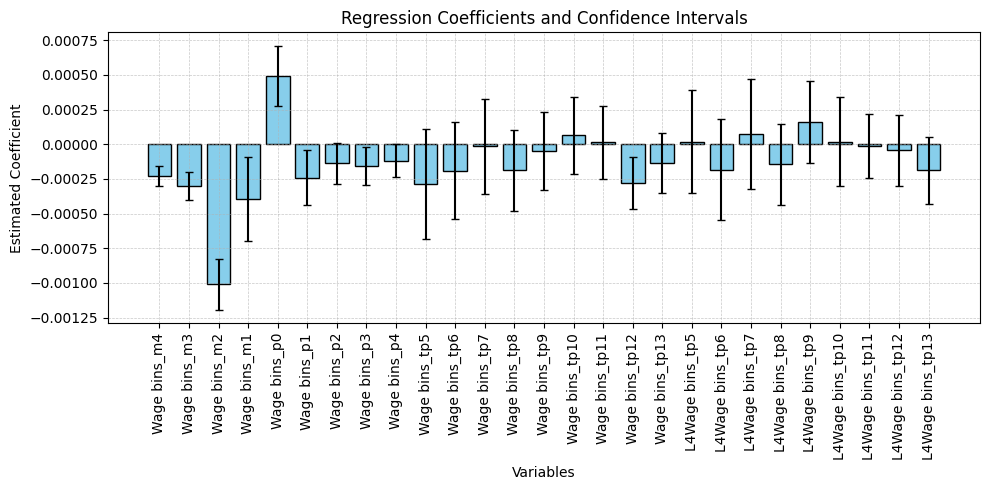

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from linearmodels.panel import PanelOLS

# Ensure 'Figure2_for_QJE.dta' exists
data = pd.read_stata('Figure2_for_QJE.dta')
data.set_index(['wagebinstate', 'quarterdate'], inplace=True)

# Fill missing value
data.fillna(0, inplace=True)

# Define variables
control_vars = ["window_m4", "window_m3", "window_m2", "window_m1", "window_p0", "window_p1", "window_p2", "window_p3", "window_p4"]
additional_vars = ["treat_p5", "treat_p6", "treat_p7", "treat_p8", "treat_p9", "treat_p10", "treat_p11", "treat_p12", "treat_p13"]
l4_additional_vars = ["L4treat_p5", "L4treat_p6", "L4treat_p7", "L4treat_p8", "L4treat_p9", "L4treat_p10", "L4treat_p11", "L4treat_p12", "L4treat_p13"]

# build regression models
model = PanelOLS(data['overallcountpc'], data[control_vars + additional_vars + l4_additional_vars], entity_effects=True, time_effects=True)
results = model.fit(cov_type='clustered', cluster_entity=True)

# compute coefficients and confidence interval
coefficients = results.params
conf_int = results.conf_int()

# New parameter name
rename_dict = {var: var.replace("window_", "Wage bins_").replace("treat_", "Wage bins_t").replace("L4treat_", "Wage bins_l") for var in coefficients.index}
coefficients = coefficients.rename(index=rename_dict)
conf_int = conf_int.rename(index=rename_dict)

# plot
fig, ax = plt.subplots(figsize=(10, 5))
# compute confience interval
yerr = [coefficients.values - conf_int.iloc[:, 0], conf_int.iloc[:, 1] - coefficients.values]
ax.bar(coefficients.index, coefficients, yerr=yerr, capsize=3, color='skyblue', edgecolor='black')
ax.set_ylabel('Estimated Coefficient')
ax.set_xlabel('Variables')
ax.set_title('Regression Coefficients and Confidence Intervals')
plt.xticks(rotation=90)
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.tight_layout()
plt.show()
